### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2020 ###

# 3 Days in Chicago – A Weekend in Chicago Itinerary You'll Love

#### Luke VandenHeuvel (lvandenheuve@wisc.edu), Bijan Tabatabai (btabatabai@wisc.edu), and Heather Jia (yjia42@wisc.edu)


*****

<h3>Table of Contents<span class="tocSkip"></span></h3>

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-Model)
  1. [Modeling Assumptions](#2.A.-Modeling-Assumptions)
  1. [Parameters](#2.B.-Parameters)
  1. [Decision Variables](#2.C.-Decision-Variables)
  1. [Constraints](#2.D.-Constraints)
  1. [Objective Function](#2.E.-Objective-Function)
1. [Solution](#3.-Solution)
  1. [Model Optimizing Enjoyment](#3.A.-Model-Optimizing-Enjoyment)
  1. [Model Optimizing Cost](#3.B.-Model-Optimizing-Cost)
  1. [Model Optimizing Enjoyment and Cost](#3.C.-Model-Optimizing-Enjoyment-and-Cost)
1. [Results and Discussion](#4.-Results-and-Discussion)
  1. [Solution Visualization](#4.A.-Solution-Visualization)
  1. [Trade-off Analysis](#4.B.-Trade-off-Analysis)
1. [Conclusion](#5.-Conclusion)
1. [Appendix](#6.-Appendix)
  1. [Data Collection](#6.A.-Data-Collection)



## 1. Introduction ##

In this project, we will use optimization techniques to find the best weekend itinerary for a trip to Chicago, which maximizes the tourists happiness and minimizes the total cost of the trip, based on tourists' enjoyment survey data. We are assuming that there is a group that is travelling to Chicago for a 3-day weekend and would like to have the most enjoyable weekend possible. We will help the group decide how to best spend their time and money so that everyone achieves as much entertainment on the trip as they can. Each person in the group will rank a list of popular activities in the corresponding order of which they most want to do and we will use that information to help them create a schedule.

<p>
    <img src="https://i.imgur.com/QcOMtdQ.jpg" width=300>
    <center><em>Popular Activities and Restaurants in Chicago</em></center>
</p>


The organizer of the trip can also reuse our code to plan for a trip to somewhere else, a trip of different duration, or change the number of group members. The only thing they need to do is to modify the activity files and collect the enjoyment survey from their group members. The format of the activity files and the enjoyment survey is descibed in this report. The organizer can also change the weight of the total happiness and the cost of the trip. By running our code, the organizer will get a schedule of the trip including what activity to do at each hour and a summary of the cost. 


## 2. Mathematical Model ##

In this section, we will discuss how to transfer the constraints and objectives into mathematical form. For the sake of convenience, we define $\mathcal{I}$ as the set containing all hours in this weekend, $\mathcal{J}$ as the set of all activities selected for the tour, and $\mathcal{K}$ as the set of all tourists in the group. 

### 2.A. Modeling Assumptions

- The decision variables will account for each of the 62 hours in the 3-day weekend (8am Friday through 10pm Sunday). 
- Each hour will be a plan for what the group should do in that given hour. 
- Constraints will be far greater as we will limit when the group should be at the hotel to sleep, when they need to eat lunch and dinner, and the amount of money they have to spend on travel and the activities, as well as how long each activity can be done for.

### 2.B. Parameters

- The each group member's enjoyment of each activity is obtained from a survey collected from all tourists in the group. $e_{k,j}$ is the enjoyment group member $k$ gets from doing activity $j$. The enjoyments range from 0 to 10. The higher the enjoyment is, the more enjoyable the tourist thinks the activity is.
- The average cost of each activity per person is collected in a list $C$, where $C_j$ is the cost of activity $j$ for a single person. We here consider the case of one-time purchase for all activities. The cost is expressed in US dollar.
- The number of tourists in the group is $c$. For our analysis, we are using $c = 4$.
- The papameter $budget$ can be manually set by the organizer of the trip. By default, $budget=1200$ because that's what the group determined would be a reasonable budget for a weekend trip with 4 people. The budget is expressed in US dollar.
- The minimum enjoyment for each tourists, $E_{min}$, can be manually set by the organizer of the trip. By default, $E_{min}=150$, which was determined by testing various different values.
- The open hours of each activity is stored in $O$, where $O_{i,j}$ is 1 when activity $j$ is closed at hour $i$, and 0 when it is open.
- Let $S$ be a vector where $S_i$ is 1 when the group should be in the hotel at hour $i$ and 0 otherwise.
- Let $H$ be the set of hotels. The data is collected from the TripAdvisor link listed in 6A.
- Let $H\_time$ be tht total number of hours the group should stay at the hotel. These times will be between 11pm until 9am each day, can be manually set by the organizer of the trip.
- Let $L$ be a vector where $L_i$ is 1 when hour $i$ is when they will to eat lunch and 0 otherwise. These times are 12pm and 1pm every day, can be manually set by the organizer of the trip.
- Let $F$ be the set of places to get food. The data is collected from the TripAdvisor link listed in 6A.
- Let $NumberLunches$ be the total number of lunches in the weekend trip. By default, $NumberLunches=2$, can be manually set by the organizer according to the how long the trip is going to take.
- Let $D$ be a vector where $D_i$ is 1 when hour $i$ is when they will to eat dinner and 0. These times are 6pm and 7pm each night, can be manually set by the organizer.
- Let $NumberDinners$ be the total number of dinners in the weekend trip. By default, $NumberDinners=3$, can be manually set by the organizer according to the how long the trip is going to take.
- Let $MaxTime_j$ be the maximum amount of time the group can do the activity $j$, can be manually set by the organizer.
- Let $MinTime_j$ be the miniimum amount of time the group can do the activity $j$, can be manually set by the organizer.

#### Activities #### 
*And their costs/parameters (found on TripAdvisor)
* Baseball Game (Wrigley Field)
 * 7pm on friday, 1pm or 4pm on saturday and sunday
 * Games last 3 hours (maybe 4 in constraint for parking driving time)
 * 76 dollars per ticket
* Cloud Gate (aka The Bean)
 * 1 hour of time
 * 8am-7pm (want to see during daylight)
 * Free
* Art Institute of Chicago
 * Suggested duration is 2-3 hours
 * Open 11am - 8pm (11am to 8pm for model)
 * 35 dollars per ticket
* Lincoln Park Zoo
 * Suggested duration is 2-3 hours
 * Open 10am - 5pm
 * Parking is 20 dollars total, entry is free
* Helicopter Tour
 * 15 minutes flight (one hour of guests time)
 * Open 9am - 6pm
 * 155 dollars per ticket
* Shedd Aquarium
 * 2-3 hours
 * Open 9am - 10pm
 * 40 dollars per ticket
* Money Museum at the Federal Reserve Bank
 * 1-2 hours
 * Open 9am-5pm
 * Free
* Adler Planetarium
 * 2-3 hours
 * Open 9am - 4pm
 * 35 dollars per ticket
* Football Game
 * 4 hours
 * Noon on sunday and saturday (college)
 * 108 dollars per ticket
* Basketball Game
 * 3 hours
 * 7pm on Friday or Saturday or 2 on Sunday
 * 60 dollars per ticket
* Lincoln Park
 * 1 hour - ??? as long as family wants?
 * Open 6am - 11pm
 * Free
* Axe throwing
 * 1 hour
 * Open 11am to 11pm
 * 15 dollars per person
* Archery Range
 * 1 hour
 * Open 11am-11pm
 * 20 dollars per person
* Turtle Racing (At a bar)
 * 1 hour
 * Friday Night 9-11pm
 * 10 dollars
* Indoor Skydiving
 * 1-2 hours
 * Open 10am-9pm
 * 60 dollars per person
* Arcade
 * 1-3 hours
 * Open noon-11pm
 * 10  dollars per person

#### Lunch and Dinner Places ####
*And their costs/parameters (found on TripAdvisor)
* Deep Dish Pizza
 * Uno Pizzaria & Grill
 * 12 dollars per person
* Chicago Style Hot Dog
 * Portillo’s
 * 8 dollars per person
* Steakhouse Fare
 * Gene & Georgetti
 * 30 dollars per person
* Barbecue Ribs
 * Twin Anchors Restaurant and Tavern
 * 20 dollars per person
* Classic Cheeseburger
 * Billy Goat Tavern
 * 8 dollars per person
* Authentic Tacos
 * Las Carnitas Uruapan
 * 10 dollars per person
* Polish Sausage
 * Jim’s Original
 * 8 dollars per person
* Chicken Pot Pie
 * The Walnut Room
 * 18 dollars per person
* Grill out at a park
 * 8 dollars per person

#### Our Suggested Hotels
*And their costs (found on TripAdvisor)
* Upper Class
 * The Gwen
 * 200 dollars per night (100 dollars per person)
* Middle Class
 * Chicago Marriott O’Hare
 * 120 dollars per night (60 dollars per person)
* Lower Class
 * Best Western Grant Park Hotel
 * 60 dollars per night (30 dollars per person)

### 2.C. Decision Variables

- The decision variable will be a matrix $X$ where its element $X_{i,j}$ represents whether or not the group is doing activity j at hour i of their trip. 
- There will also be a vector of decision variables $Z$, where $Z_j$ is 1 the group does activity j sometime one the trip, and 0 otherwise.

### 2.D. Constraints

#### Total Cost Constraint

The total cost of the trip can not be larger than a specified amount. 
$$
 0 \leq \quad \sum_{j=1}^{\Vert \mathcal{J} \Vert}z_jC_{j}c\leq budget
$$

<a id='constraints'></a>
#### Minimum Enjoyment Constraint

The amount of total enjoyment from can’t be lower than a specified amount for each tourist.
    
$$\forall k \in \mathcal{K}, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}\sum_{j=1}^{\Vert \mathcal{J} \Vert}e_{i,j}X_{i,j}\geq E_{min}$$


#### Activity Availability Constraint
The group can only do an activity if that activity is open. 
$$
\quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}O_{i,j}X_{i,j}=0
$$

#### Rest Time Constraint

The group will be at the hotel for some time every night. 
$$
\forall j \in H, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}S_{i}X_{i,j}=H\_time
$$

#### One Hotel Constraint

The group will only stay in one hotel during their trip,
$$\quad \sum_{h\in H}z_{h}=1$$

#### Lunch Time Constraint
The group must eat lunch each day,
$$\forall k \in \mathcal{K}, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}\sum_{f=1}^{\Vert \mathcal{F} \Vert}L_{i}X_{i,j} = TimeAtLunch*NumberLunches$$

#### Dinner Time Constraint
The group must eat dinner each day,
$$\forall k \in \mathcal{K}, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}\sum_{d=1}^{\Vert \mathcal{D} \Vert}D_{i}X_{i,j} = TimeAtDinner*NumberDinners$$

### Activity Constraints
##### No Repetition in Activity Arrangement
The group will not go to an activity more than once in their trip,
$$
\forall \; 1 < i \leq \Vert \mathcal{I}\Vert \; j \notin H, \lambda_{i,j}=|X_{i,j} - X_{i-1,j}|\\
\forall j \notin H, \lambda_{1,j}=X_{1,j}\\
\forall j \in \mathcal{J}, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}\lambda_{i,j}<=2
$$
##### One Activity at A Time
The group is either doing an activity at a certain time or they are not,
$$
\forall i \in \mathcal{I}, \quad \sum_{j=1}^{\Vert \mathcal{J} \Vert} X_{i,j}=1
$$

##### Introduce z
If zj is 1, then the group did activity i on their trip,
$$
z_{j}\in \{0,1\}\\
\forall j, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}X_{i,j}\leq Mz_j
$$
where M is the upper bound.

##### Limited Time for A Single Activity
The group can not do an activity for an unlimited amount of time，
$$
\forall j, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}X_{i,j}\leq MaxTime_jz_j
$$
If the group does an activity, they must do it for a minimum amount of time,
$$
\forall j, \quad \sum_{i=1}^{\Vert \mathcal{I} \Vert}X_{i,j}\geq MinTime_jz_j
$$

### 2.E. Objective Function

When the organizer focuses on the tourist $enjoyment$, our objective is to maximize the total amount of “enjoyment” a group gets from their weekend trip to Chicago.

When the organizer focuses on the total $cost$, our objective is to minimize the total cost of weekend trip to Chicago.

When the organizer want to consider $both$ $enjoyment$ $and$ $cost$, our objective puts a weight on the negative cost to indicate how much a lower cost is desired. The weight is a given parameter from the organizer.

#### Tourist Enjoyment
When we maximize the total amount of “enjoyment” a group, the objective is,
$$
\max \quad \sum_{k}^{\Vert \mathcal{K} \Vert}\sum_{i}^{\Vert \mathcal{I} \Vert}\sum_{j}^{\Vert \mathcal{J} \Vert}e_{k,j}X_{i,j}
$$

#### Total Cost
When we minimize the total cost of a group, the objective is,
$$
\min \quad \sum_{j}^{\Vert \mathcal{J} \Vert}z_{j}C_{j}c
$$

#### Combination of Tourist Enjoyment and Total Cost
When we want to consider both the enjoyment and the cost, the objective is,
$$
\max \quad \sum_{k}^{\Vert \mathcal{K} \Vert}\sum_{i}^{\Vert \mathcal{I} \Vert}\sum_{j}^{\Vert \mathcal{J} \Vert}e_{k,j}X_{i,j} - \lambda\quad \sum_{j}^{\Vert \mathcal{J} \Vert}z_{j}C_{j}c
$$

## 3. Solution ##


### 3.A. Model Optimizing Enjoyment



In [51]:
using JuMP
using Cbc
using CSV

function read_csv(filename)
    raw = CSV.read(filename)
    (rows, cols) = size(raw)
    raw = raw[1:rows, 2:cols]
    data = convert(Matrix{Float64}, raw)
    return data
end

budget = 1200
num_people = 4
min_enjoyment = 150

survey_data = read_csv("survey_data.CSV")
hours_open = read_csv("hours_open.csv")
time_limits = read_csv("time_limits.csv")
costs = read_csv("costs.csv")
activities = convert(Matrix{String}, CSV.read("activities.csv", header=0))
activities = rstrip.(activities)
times = convert(Matrix{String}, CSV.read("times.csv", delim=",", header=0))
times = rstrip.(times)

manditory_hotel_time = [16:25; 40:49]
hotel_indices = 21:23

manditory_food_time = [5; 6; 11; 12; 29; 30; 35; 36; 53; 54; 59; 60]
food_indices = [1; 9; 10; 12:20]

(num_hours, num_activities) = size(hours_open)

m = Model(with_optimizer(Cbc.Optimizer, logLevel=0))

@variable(m, x[1:num_hours,1:num_activities], Bin)
@variable(m, lambda[1:num_hours,1:num_activities] >= 0)
@variable(m, z[1:num_activities], Bin)

# The group is either doing an activity at a certain time or they're not
@constraint(m, [i=1:num_hours, j=1:num_activities], x[i,j] <= 1)

# z[j] is 1 if the group did activity j during their trip
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= num_hours*z[j])

# The group can only do one activity at a time
@constraint(m, [i=1:num_hours], sum(x[i,j] for j in 1:num_activities) == 1)

# The group cannot do an activity for an unlimited amount of time
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= time_limits[j,2])

# If the group does an activity, the must do it for a minimum amount of time
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) >= time_limits[j,1] * z[j])

# The total cost of the trip is less than the group's budget
@constraint(m,  sum(z[j]*num_people*costs[j] for j in 1:num_activities) <= budget)

# Each person in the group must get some baseline of enjoyment
@constraint(m, [p=1:num_people], sum(sum(survey_data[p,j]*x[i,j] for i in 1:num_hours) for j in 1:num_activities) >= min_enjoyment)

# The group can only do an activity if it is open
@constraint(m, [j=1:num_activities], sum(hours_open[i,j]*x[i,j] for i in 1:num_hours) == 0)

# The group must stay at the hotel for sometime each night
@constraint(m, sum(sum(x[manditory_hotel_time,hotel_indices])) == length(manditory_hotel_time))

# The group can only stay at one hotel during their trip
@constraint(m, sum(z[j] for j in hotel_indices) == 1)

# The group must eat meals
@constraint(m, sum(sum(x[manditory_food_time,food_indices])) == length(manditory_food_time))

# The group can only visit an activity (other than the hotel) once
# lambda 1 one when the group starts or stops an activity
for j in 1:num_activities
    if j in hotel_indices
        continue
    end

    @constraint(m, lambda[1, j] == x[1, j])

    for i in 2:num_hours
        @constraint(m, lambda[i,j] >= x[i,j] - x[i-1,j])
        @constraint(m, lambda[i,j] >= -x[i,j] + x[i-1,j])
    end
end
@constraint(m, [j=1:num_activities], sum(lambda[i,j] for i in 1:num_hours) <= 2)

# Our objective is to maximize enjoyment!
@objective(m, Max, sum(sum(sum(survey_data[p,j]*x[i,j] for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities))
optimize!(m)

println(termination_status(m))
x_values = value.(x)

for i in 1:num_hours
    print(times[i], ":\t")
    for j in 1:num_activities
        if round(x_values[i,j]) == 1
            println(activities[j])
            break
        end
    end
end

enjoyment = sum(sum(sum(survey_data[p,j]*value(x[i,j]) for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities)
cost = sum(value(z[j])*num_people*costs[j] for j in 1:num_activities)
println()
println("Total enjoyment: ", enjoyment)
println("Total cost: ",cost, " dollars")

OPTIMAL
8 AM Friday:	Lincoln Park
9 AM Friday:	Lincoln Park
10 AM Friday:	Lincoln Park
11 AM Friday:	Lincoln Park
12 PM Friday:	Chicken Pot Pie
1 PM Friday:	Chicken Pot Pie
2 PM Friday:	Money Museum at the Federal Reserve Bank
3 PM Friday:	Money Museum at the Federal Reserve Bank
4 PM Friday:	Archery Range
5 PM Friday:	Archery Range
6 PM Friday:	Classic Cheeseburger
7 PM Friday:	Classic Cheeseburger
8 PM Friday:	Shedd Aquarium
9 PM Friday:	Shedd Aquarium
10 PM Friday:	Shedd Aquarium
11 PM Friday:	Upper Class Hotel
12 AM Saturday:	Upper Class Hotel
1 AM Saturday:	Upper Class Hotel
2 AM Saturday:	Upper Class Hotel
3 AM Saturday:	Upper Class Hotel
4 AM Saturday:	Upper Class Hotel
5 AM Saturday:	Upper Class Hotel
6 AM Saturday:	Upper Class Hotel
7 AM Saturday:	Upper Class Hotel
8 AM Saturday:	Upper Class Hotel
9 AM Saturday:	Upper Class Hotel
10 AM Saturday:	Upper Class Hotel
11 AM Saturday:	Upper Class Hotel
12 PM Saturday:	Authentic Tacos
1 PM Saturday:	Authentic Tacos
2 PM Saturday:	Upp

### 3.B. Model Optimizing Cost



In [50]:
using JuMP
using Cbc
using CSV

function read_csv(filename)
    raw = CSV.read(filename)
    (rows, cols) = size(raw)
    raw = raw[1:rows, 2:cols]
    data = convert(Matrix{Float64}, raw)
    return data
end

budget = 1200
num_people = 4
min_enjoyment = 150

survey_data = read_csv("survey_data.CSV")
hours_open = read_csv("hours_open.csv")
time_limits = read_csv("time_limits.csv")
costs = read_csv("costs.csv")
activities = convert(Matrix{String}, CSV.read("activities.csv", header=0))
activities = rstrip.(activities)
times = convert(Matrix{String}, CSV.read("times.csv", delim=",", header=0))
times = rstrip.(times)

manditory_hotel_time = [16:25; 40:49]
hotel_indices = 21:23

manditory_food_time = [5; 6; 11; 12; 29; 30; 35; 36; 53; 54; 59; 60]
food_indices = [1; 9; 10; 12:20]

(num_hours, num_activities) = size(hours_open)

m = Model(with_optimizer(Cbc.Optimizer, logLevel=0))

@variable(m, x[1:num_hours,1:num_activities], Bin)
@variable(m, lambda[1:num_hours,1:num_activities] >= 0)
@variable(m, z[1:num_activities], Bin)

# The group is either doing an activity at a certain time or they're not
@constraint(m, [i=1:num_hours, j=1:num_activities], x[i,j] <= 1)

# z[j] is 1 if the group did activity j during their trip
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= num_hours*z[j])

# The group can only do one activity at a time
@constraint(m, [i=1:num_hours], sum(x[i,j] for j in 1:num_activities) == 1)

# The group cannot do an activity for an unlimited amount of time
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= time_limits[j,2])

# If the group does an activity, the must do it for a minimum amount of time
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) >= time_limits[j,1] * z[j])

# The total cost of the trip is less than the group's budget
@constraint(m,  sum(z[j]*num_people*costs[j] for j in num_activities) <= budget)

# Each person in the group must get some baseline of enjoyment
@constraint(m, [p=1:num_people], sum(sum(survey_data[p,j]*x[i,j] for i in 1:num_hours) for j in 1:num_activities) >= min_enjoyment)

# The group can only do an activity if it is open
@constraint(m, [j=1:num_activities], sum(hours_open[i,j]*x[i,j] for i in 1:num_hours) == 0)

# The group must stay at the hotel for sometime each night
@constraint(m, sum(sum(x[manditory_hotel_time,hotel_indices])) == length(manditory_hotel_time))

# The group can only stay at one hotel during their trip
@constraint(m, sum(z[j] for j in hotel_indices) == 1)

# The group must eat meals
@constraint(m, sum(sum(x[manditory_food_time,food_indices])) == length(manditory_food_time))

# The group can only visit an activity (other than the hotel) once
# lambda 1 one when the group starts or stops an activity
for j in 1:num_activities
    if j in hotel_indices
        continue
    end

    @constraint(m, lambda[1, j] == x[1, j])

    for i in 2:num_hours
        @constraint(m, lambda[i,j] >= x[i,j] - x[i-1,j])
        @constraint(m, lambda[i,j] >= -x[i,j] + x[i-1,j])
    end
end
@constraint(m, [j=1:num_activities], sum(lambda[i,j] for i in 1:num_hours) <= 2)

# Our objective is to minimize cost!
@objective(m, Min, sum(z[j]*num_people*costs[j] for j in 1:num_activities))
optimize!(m)

println(termination_status(m))
x_values = value.(x)

for i in 1:num_hours
    print(times[i], ":\t")
    for j in 1:num_activities
        if round(x_values[i,j]) == 1
            println(activities[j])
            break
        end
    end
end

enjoyment = sum(sum(sum(survey_data[p,j]*value(x[i,j]) for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities)
cost = sum(value(z[j])*num_people*costs[j] for j in 1:num_activities)
println()
println("Total enjoyment: ", enjoyment)
println("Total cost: ",cost, " dollars")

OPTIMAL
8 AM Friday:	Lincoln Park
9 AM Friday:	Lincoln Park
10 AM Friday:	Lincoln Park
11 AM Friday:	Lincoln Park
12 PM Friday:	Chicago Style Hot Dog
1 PM Friday:	Chicago Style Hot Dog
2 PM Friday:	Lower Class Hotel
3 PM Friday:	Cloud Gate (aka The Bean)
4 PM Friday:	Cloud Gate (aka The Bean)
5 PM Friday:	Money Museum at the Federal Reserve Bank
6 PM Friday:	Polish Sausage
7 PM Friday:	Polish Sausage
8 PM Friday:	Lower Class Hotel
9 PM Friday:	Lower Class Hotel
10 PM Friday:	Lower Class Hotel
11 PM Friday:	Lower Class Hotel
12 AM Saturday:	Lower Class Hotel
1 AM Saturday:	Lower Class Hotel
2 AM Saturday:	Lower Class Hotel
3 AM Saturday:	Lower Class Hotel
4 AM Saturday:	Lower Class Hotel
5 AM Saturday:	Lower Class Hotel
6 AM Saturday:	Lower Class Hotel
7 AM Saturday:	Lower Class Hotel
8 AM Saturday:	Lower Class Hotel
9 AM Saturday:	Lower Class Hotel
10 AM Saturday:	Lower Class Hotel
11 AM Saturday:	Lower Class Hotel
12 PM Saturday:	Classic Cheeseburger
1 PM Saturday:	Classic Cheeseburge

### 3.C. Model Optimizing Enjoyment and Cost

In [49]:
using JuMP
using Cbc
using CSV

function read_csv(filename)
    raw = CSV.read(filename)
    (rows, cols) = size(raw)
    raw = raw[1:rows, 2:cols]
    data = convert(Matrix{Float64}, raw)
    return data
end

budget = 1200
num_people = 4
min_enjoyment = 150

survey_data = read_csv("survey_data.CSV")
hours_open = read_csv("hours_open.csv")
time_limits = read_csv("time_limits.csv")
costs = read_csv("costs.csv")
activities = convert(Matrix{String}, CSV.read("activities.csv", header=0))
activities = rstrip.(activities)
times = convert(Matrix{String}, CSV.read("times.csv", delim=",", header=0))
times = rstrip.(times)

manditory_hotel_time = [16:25; 40:49]
hotel_indices = 21:23

manditory_food_time = [5; 6; 11; 12; 29; 30; 35; 36; 53; 54; 59; 60]
food_indices = [1; 9; 10; 12:20]

(num_hours, num_activities) = size(hours_open)

m = Model(with_optimizer(Cbc.Optimizer, logLevel=0))

@variable(m, x[1:num_hours,1:num_activities], Bin)
@variable(m, lambda[1:num_hours,1:num_activities] >= 0)
@variable(m, z[1:num_activities], Bin)

# The group is either doing an activity at a certain time or they're not
@constraint(m, [i=1:num_hours, j=1:num_activities], x[i,j] <= 1)

# z[j] is 1 if the group did activity j during their trip
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= num_hours*z[j])

# The group can only do one activity at a time
@constraint(m, [i=1:num_hours], sum(x[i,j] for j in 1:num_activities) == 1)

# The group cannot do an activity for an unlimited amount of time
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= time_limits[j,2])

# If the group does an activity, the must do it for a minimum amount of time
@constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) >= time_limits[j,1] * z[j])

# The total cost of the trip is less than the group's budget
@constraint(m,  sum(z[j]*num_people*costs[j] for j in num_activities) <= budget)

# Each person in the group must get some baseline of enjoyment
@constraint(m, [p=1:num_people], sum(sum(survey_data[p,j]*x[i,j] for i in 1:num_hours) for j in 1:num_activities) >= min_enjoyment)

# The group can only do an activity if it is open
@constraint(m, [j=1:num_activities], sum(hours_open[i,j]*x[i,j] for i in 1:num_hours) == 0)

# The group must stay at the hotel for sometime each night
@constraint(m, sum(sum(x[manditory_hotel_time,hotel_indices])) == length(manditory_hotel_time))

# The group can only stay at one hotel during their trip
@constraint(m, sum(z[j] for j in hotel_indices) == 1)

# The group must eat meals
@constraint(m, sum(sum(x[manditory_food_time,food_indices])) == length(manditory_food_time))

# The group can only visit an activity (other than the hotel) once
# lambda 1 one when the group starts or stops an activity
for j in 1:num_activities
    if j in hotel_indices
        continue
    end

    @constraint(m, lambda[1, j] == x[1, j])

    for i in 2:num_hours
        @constraint(m, lambda[i,j] >= x[i,j] - x[i-1,j])
        @constraint(m, lambda[i,j] >= -x[i,j] + x[i-1,j])
    end
end
@constraint(m, [j=1:num_activities], sum(lambda[i,j] for i in 1:num_hours) <= 2)

# Our objective is to minimize cost!
@objective(m, Max,
    sum(sum(sum(survey_data[p,j]*x[i,j] for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities)
    - sum(z[j]*num_people*costs[j] for j in 1:num_activities))
optimize!(m)

println(termination_status(m))
x_values = value.(x)

for i in 1:num_hours
    print(times[i], ":\t")
    for j in 1:num_activities
        if round(x_values[i,j]) == 1
            println(activities[j])
            break
        end
    end
end

enjoyment = sum(sum(sum(survey_data[p,j]*value(x[i,j]) for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities)
cost = sum(value(z[j])*num_people*costs[j] for j in 1:num_activities)
println()
println("Total enjoyment: ", enjoyment)
println("Total cost: ",cost, " dollars")

OPTIMAL
8 AM Friday:	Middle Class Hotel
9 AM Friday:	Middle Class Hotel
10 AM Friday:	Middle Class Hotel
11 AM Friday:	Middle Class Hotel
12 PM Friday:	Deep Dish Pizza
1 PM Friday:	Deep Dish Pizza
2 PM Friday:	Lincoln Park
3 PM Friday:	Lincoln Park
4 PM Friday:	Lincoln Park
5 PM Friday:	Lincoln Park
6 PM Friday:	Authentic Tacos
7 PM Friday:	Authentic Tacos
8 PM Friday:	Middle Class Hotel
9 PM Friday:	Middle Class Hotel
10 PM Friday:	Middle Class Hotel
11 PM Friday:	Middle Class Hotel
12 AM Saturday:	Middle Class Hotel
1 AM Saturday:	Middle Class Hotel
2 AM Saturday:	Middle Class Hotel
3 AM Saturday:	Middle Class Hotel
4 AM Saturday:	Middle Class Hotel
5 AM Saturday:	Middle Class Hotel
6 AM Saturday:	Middle Class Hotel
7 AM Saturday:	Middle Class Hotel
8 AM Saturday:	Middle Class Hotel
9 AM Saturday:	Middle Class Hotel
10 AM Saturday:	Middle Class Hotel
11 AM Saturday:	Middle Class Hotel
12 PM Saturday:	Classic Cheeseburger
1 PM Saturday:	Classic Cheeseburger
2 PM Saturday:	Lincoln Park

## 4. Results and Discussion ##

After visualizing our 3 types of models, there are many ways to interperet them, and many ways to determine which model would be the best for each group. 

The first model (3.A) only takes enjoyment into account. There is a constraint on the budget that can be used, based on what the group has decided, but it is not factored into the objective function. As you can clearly see, the weekend is fairly action packed and there is not a lot of "down time". The class of the hotel is of a great priority as there is a lot of time spent there, and the total enjoyment is at the highest of any of the 3 models. 

The second model (3.B) only factors in the cost of the trip. The activity plan of this trip really only accounts for the necessary activities such as eating each meal and sleeping at the hotel. Since the Hotel is a daily cost, all of the extra time that the group has is spent there, or else doing free activities. This is not a very realistic situation, as any group taking a trip would not be most concerned about not spending money or else they would probably not be on a vacation in the first place. Although visiting new restaurants may be enjoyable, taking a trip to Chicago for only that and  the hotel seems like a stretch.

The third model (3.C) factors in the groups enjoyment, as well as the cost of the activities. The objective function sums the enjoyment of all of the activities that are planned and it also subtracts the costs of the activities. Therefore, it discludes those activities that are not as cost-efficient, basically meaning the extra activity would not be "worth the cost" required to do it. 

The model that takes enjoyment and cost into the objective function seems that it would be effective for most groups wanting to take a trip (model 3.C). However, there are certain situations where a group doesn't care about the cost of the weekend as long as it doesn't exceed there predetermined amount, in which model (3.A) would be most beneficial. Either way, once each member of the group rates their activities and decide on a budget, there is a model that can best apply to any of them.

### 4.A. Visualization


<p>
    <img src="https://i.imgur.com/2jimN9Y.png" width=800>
    <center><em>Map of the Locations the Group Will Go During Their Trip using model 3.C</em></center>
</p>


### 4.B. Trade-off Analysis
<p>
    We have assumed that there is a trade-off relationship between the enjoyment score and the total cost of the trip.This trade-off is well demonstrated in the results shown in section 3.
</p>
<p>
        When we have the model only maximize the total enjoyment, the arrangement of the tour gives the highest total enjoyment score based on the survey filled out by tourists in the group. The most popular activities and the nicest hotel are chosen. The only consideration for cost in this model is to ensure that the group stays within their budget. Because of that, the total cost of the trip ends up being just a hair below their budget of \$1200.
</p>
<p>
When we have the model minimize the total cost, the arrangement of the tour gives the lowest possible cost of the whole trip. Cheap meals and lower class hotels are chosen to minimize the cost. The tourists have to spend most of the time at the hotel to avoid the costs of activities. When the group does go out on the town, they only do activities that open to the public for free. These free activities allow the group to get their minimum required enjoyment without increasing the cost of their trip.
</p>
<p>
    Both of the above scenarios might not be ideal to a group of people who want to visit Chicago. While maximizing the enjoyment will lead to a fun trip, they might not want to spend <i>all</i> of the money they have budgeted in case of emergencies. On the other hand, it is clear that a trip that minimizes costs by staying in a bad hotel for most of the weekend will not be very fun. Therefore it seems obvious to take both enjoyment and cost into account. When we optimize both the enjoyment and the cost ($\lambda = 1$ in section 3.C), a compromise plan is produced that yields relatively high enjoyments and a moderate cost at the same time. In the above combined scenario, the group stays at a modest hotel and spends almost every waking hour seeing the city without breaking the bank.
</p>

We can use a graph to further analyze the trade-off with different weights on the enjoyment and the cost.

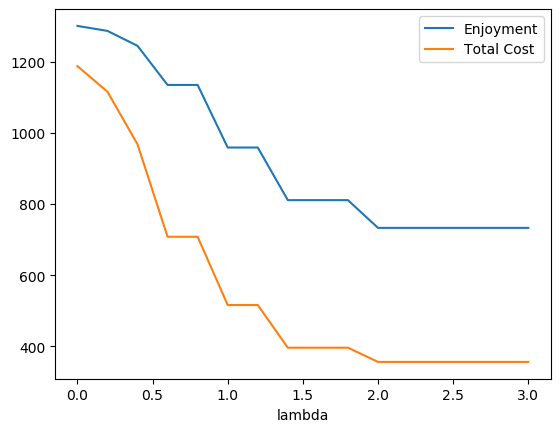

PyObject <matplotlib.legend.Legend object at 0x7fd5360748d0>

In [4]:
using JuMP
using Cbc
using CSV
using PyPlot

function read_csv(filename)
    raw = CSV.read(filename)
    (rows, cols) = size(raw)
    raw = raw[1:rows, 2:cols]
    data = convert(Matrix{Float64}, raw)
    return data
end

budget = 1200
num_people = 4
min_enjoyment = 150

survey_data = read_csv("survey_data.CSV")
hours_open = read_csv("hours_open.csv")
time_limits = read_csv("time_limits.csv")
costs = read_csv("costs.csv")
activities = convert(Matrix{String}, CSV.read("activities.csv", header=0))
activities = rstrip.(activities)
times = convert(Matrix{String}, CSV.read("times.csv", delim=",", header=0))
times = rstrip.(times)

manditory_hotel_time = [16:25; 40:49]
hotel_indices = 21:23

manditory_food_time = [5; 6; 11; 12; 29; 30; 35; 36; 53; 54; 59; 60]
food_indices = [1; 9; 10; 12:20]

(num_hours, num_activities) = size(hours_open)

function chicago(lam)
    m = Model(with_optimizer(Cbc.Optimizer, logLevel=0))
    
    @variable(m, x[1:num_hours,1:num_activities], Bin)
    @variable(m, lambda[1:num_hours,1:num_activities] >= 0)
    @variable(m, z[1:num_activities], Bin)
    
    # The group is either doing an activity at a certain time or they're not
    @constraint(m, [i=1:num_hours, j=1:num_activities], x[i,j] <= 1)
    
    # z[j] is 1 if the group did activity j during their trip
    @constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= num_hours*z[j])
    
    # The group can only do one activity at a time
    @constraint(m, [i=1:num_hours], sum(x[i,j] for j in 1:num_activities) == 1)
    
    # The group cannot do an activity for an unlimited amount of time
    @constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) <= time_limits[j,2])
    
    # If the group does an activity, the must do it for a minimum amount of time
    @constraint(m, [j=1:num_activities], sum(x[i,j] for i in 1:num_hours) >= time_limits[j,1] * z[j])
    
    # The total cost of the trip is less than the group's budget
    @constraint(m,  sum(z[j]*num_people*costs[j] for j in 1:num_activities) <= budget)
    
    # Each person in the group must get some baseline of enjoyment
    @constraint(m, [p=1:num_people], sum(sum(survey_data[p,j]*x[i,j] for i in 1:num_hours) for j in 1:num_activities) >= min_enjoyment)
    
    # The group can only do an activity if it is open
    @constraint(m, [j=1:num_activities], sum(hours_open[i,j]*x[i,j] for i in 1:num_hours) == 0)
    
    # The group must stay at the hotel for sometime each night
    @constraint(m, sum(sum(x[manditory_hotel_time,hotel_indices])) == length(manditory_hotel_time))
    
    # The group can only stay at one hotel during their trip
    @constraint(m, sum(z[j] for j in hotel_indices) == 1)
    
    # The group must eat meals
    @constraint(m, sum(sum(x[manditory_food_time,food_indices])) == length(manditory_food_time))
    
    # The group can only visit an activity (other than the hotel) once
    # lambda 1 one when the group starts or stops an activity
    for j in 1:num_activities
        if j in hotel_indices
            continue
        end
    
        @constraint(m, lambda[1, j] == x[1, j])
    
        for i in 2:num_hours
            @constraint(m, lambda[i,j] >= x[i,j] - x[i-1,j])
            @constraint(m, lambda[i,j] >= -x[i,j] + x[i-1,j])
        end
    end
    @constraint(m, [j=1:num_activities], sum(lambda[i,j] for i in 1:num_hours) <= 2)
    
    # Our objective is to maximize enjoyment!
    @objective(m, Max,
        sum(sum(sum(survey_data[p,j]*x[i,j] for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities)
            - lam * sum(z[j]*num_people*costs[j] for j in 1:num_activities))
    optimize!(m)

    enjoyment = sum(sum(sum(survey_data[p,j]*value(x[i,j]) for p in 1:num_people) for i in 1:num_hours) for j in 1:num_activities)
    cost = sum(value(z[j])*num_people*costs[j] for j in 1:num_activities)

    return (enjoyment, cost)
end

lambda = collect(range(0, step=0.2, 3))
enj = []
c = []

for l in lambda
    (enjoyment, cost) = chicago(l)
    push!(enj, enjoyment)
    push!(c, cost)
end

figure()
xlabel("lambda")

plot(lambda, enj)
plot(lambda, c)
legend(["Enjoyment", "Total Cost"])


From the graph above, we can see that as $\lambda$ increases, i.e. we are taking cost more into account, both the cost and enjoyment of the trip decrease as we would expect. The plateaus that we see are likely due to the fact that our decision variables are discrete, so in those areas, small changes in $\lambda$ do not affect our results. Finally, It seems that at $\lambda \geq 2$, both plots plateau for good, so that is likely the point where factoring in the costs completely.

## 5. Conclusion
In this project, we have demonstrated how to use an optimization model to solve a real-life group assignment problem. We also illustrated the model design process through variable determination, data manipulation and constraint/objective transformation. In the trade-off analysis, we have shown there is indeed a trade-off relationship between the enjoyment of the toursists and the total cost. Through constraint and objectives design, we made this model flexible such that trip organizer can control all the weights for objectives and each single factors. Also, instructors can add new activities and hotels easily, for more coloful trips or for different groups.

Finally, we do realize the importance of model interpretation. Interpreting the optimal solution really helped us see why it is optimal, and understand how model behaves in a higher level. With good interpretations, one can further improve the model by tuning parameters. On the other hand, interpretation tells us more information about the domain problem, which provides a way to design a more problem-specific algorithm.


## 6. Appendix

### 6.A. Data Collection

**Enjoyments survey**: We created a table of mock survey data. We tried to make the ratings realistic in order to have an accurate picture of our model. If someone was to use this model to actually plan out an optimal trip, they would have the people going on the trip fill in the data themselves. The enjoyments range from 0 to 10. The higher, the more enjoyable the tourist thinks the activity is.

**Activities data**: https://www.tripadvisor.com/Attractions-g35805-Activities-Chicago_Illinois.html

**Restaurants data**: https://www.tripadvisor.com/Restaurants-g35805-Chicago_Illinois.html

**Hotels data**: we averaged the price of different hotels on https://www.tripadvisor.com/Hotels-g35805-Chicago_Illinois-Hotels.html


